# Convex Hull Trick

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import bisect

In [78]:
def plot_line(slopes, y_intercepts):
    # Generate x values
    x_values = np.linspace(-10, 10, 100)
        
    plt.figure(figsize=(20, 12))  # Adjust the width and height as needed

   # Plot each line
    for i, (slope, y_intercept) in enumerate(zip(slopes, y_intercepts), start = 1):
        y_values = slope * x_values + y_intercept
        plt.plot(x_values, y_values, label=f'y = {slope}x + {y_intercept}')

        plt.text(x_values[10], y_values[10], f"l{i}", color='black', fontsize = 30)  # Adjust position (x_values[50], y_values[50]) as needed

        # Highlight the y-intercept point
        plt.scatter(0, y_intercept, color='red', marker='o')


    # Highlight the upper convex hull
    # upper_hull = np.max(np.vstack([slope * x_values + y_intercept for slope, y_intercept in zip(slopes, y_intercepts)]), axis=0)
    # plt.fill_between(x_values, upper_hull, color='yellow', alpha=0.3, label='Upper Convex Hull')

    # Set labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plotting Lines in Python')
    
    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.show()

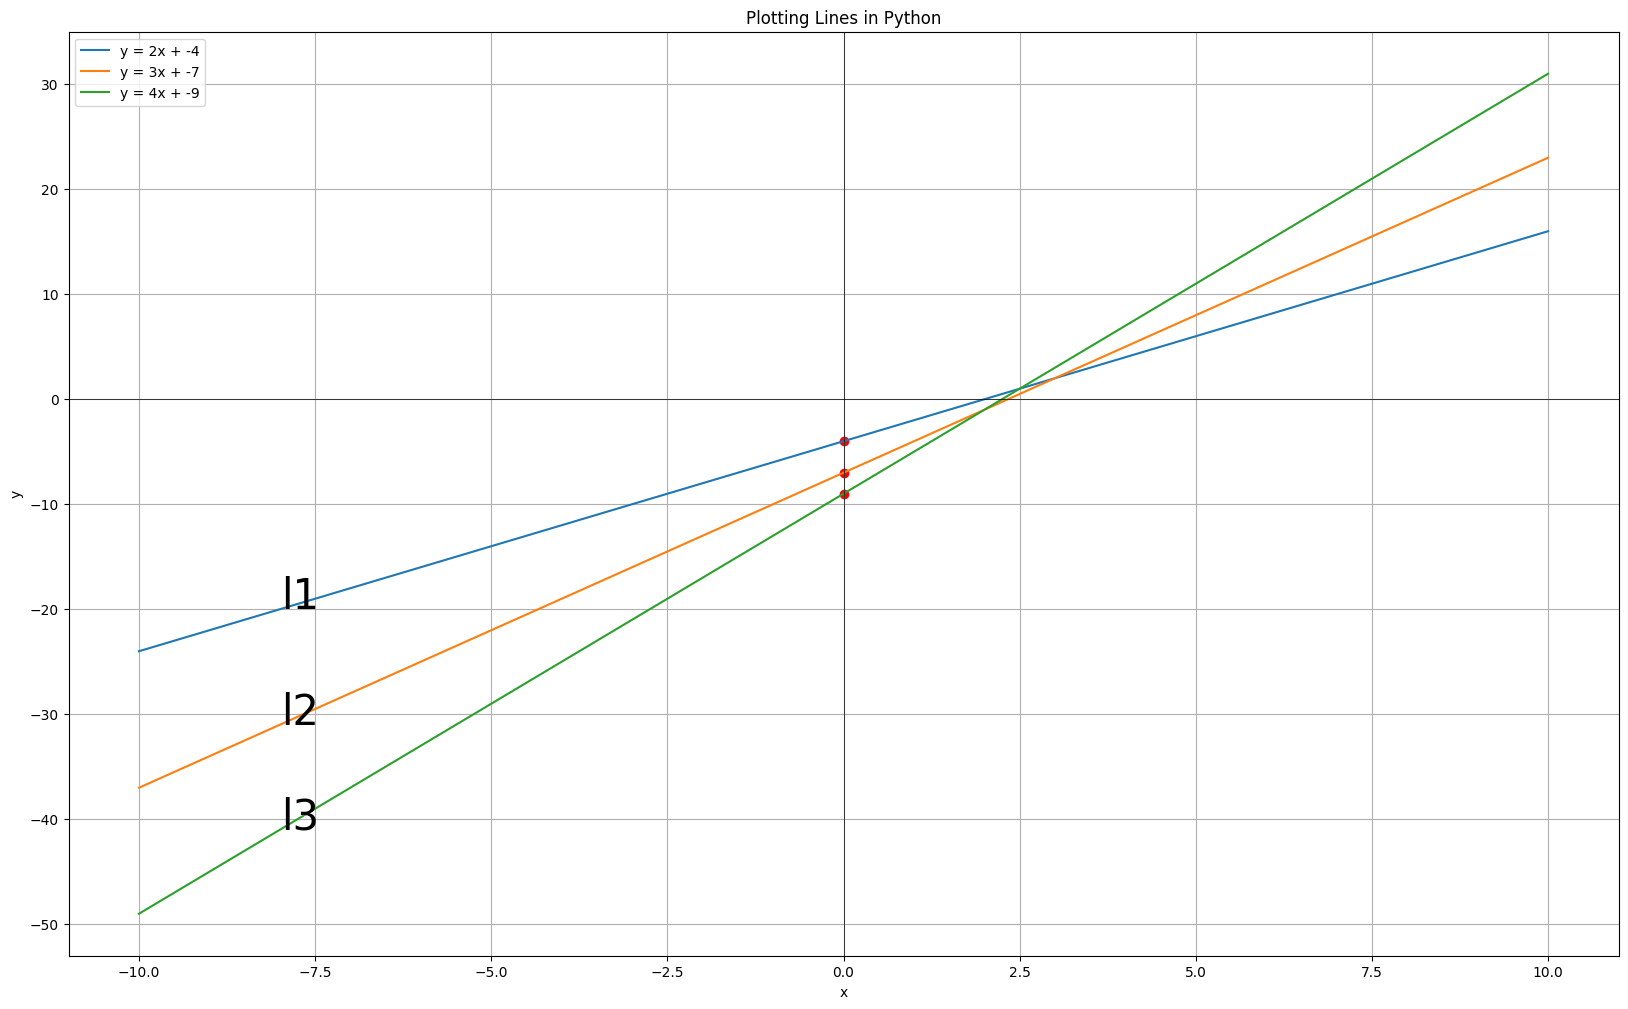

In [151]:
N = 4
arr = [0, 4, 3, 2, 5]

class Line:
    def __init__(self, m, b):
        self.m = m
        self.b = b
    def eval(self, x):
        return self.m * x + self.b
    def __repr__(self):
        return f"slope: {self.m}, y-intercept: {self.b}"
    
def increasing_monotonic_stack(p1, p2, p3):
    return (p1.m - p2.m) * (p3.b - p1.b) <= (p1.m - p3.m) * (p2.b - p1.b)

indices = list(range(N + 1))
psum = [0] * (N + 1)
total = 0
for i in range(N):
    psum[i + 1] = psum[i] + arr[i + 1]
    total += (i + 1) * arr[i + 1]
max_delta = 0
# max_delta = 1
# increasing slopes
# dp[i] = max(arr[i] * j - psum[j - 1]) for j in [1, i] + psum[i - 1] - arr[i] * i
# right cyclic subarray shift
hull = []
for i in range(2, N + 1):
    m = i
    b = -psum[i - 1]
    x = arr[i]
    line = Line(m, b)
    # while len(hull) >= 2 and increasing_monotonic_stack(hull[-2], hull[-1], line):
    #     hull.pop()
    hull.append(line)
    # print(line)
    # idx = bisect.bisect_left(indices[:len(hull) - 1], True, key = lambda i: x * (hull[i].m - hull[i + 1].m) >= hull[i + 1].b - hull[i].b)
    # print(idx, hull[idx])
    # max_delta = max(max_delta, hull[idx].eval(x) + psum[i - 1] - arr[i] * i)
# print(max_delta)
# assert max_delta == 1, "wrong max_delta"
slopes = [line.m for line in hull]
y_intercepts = [line.b for line in hull]
plot_line(slopes, y_intercepts)

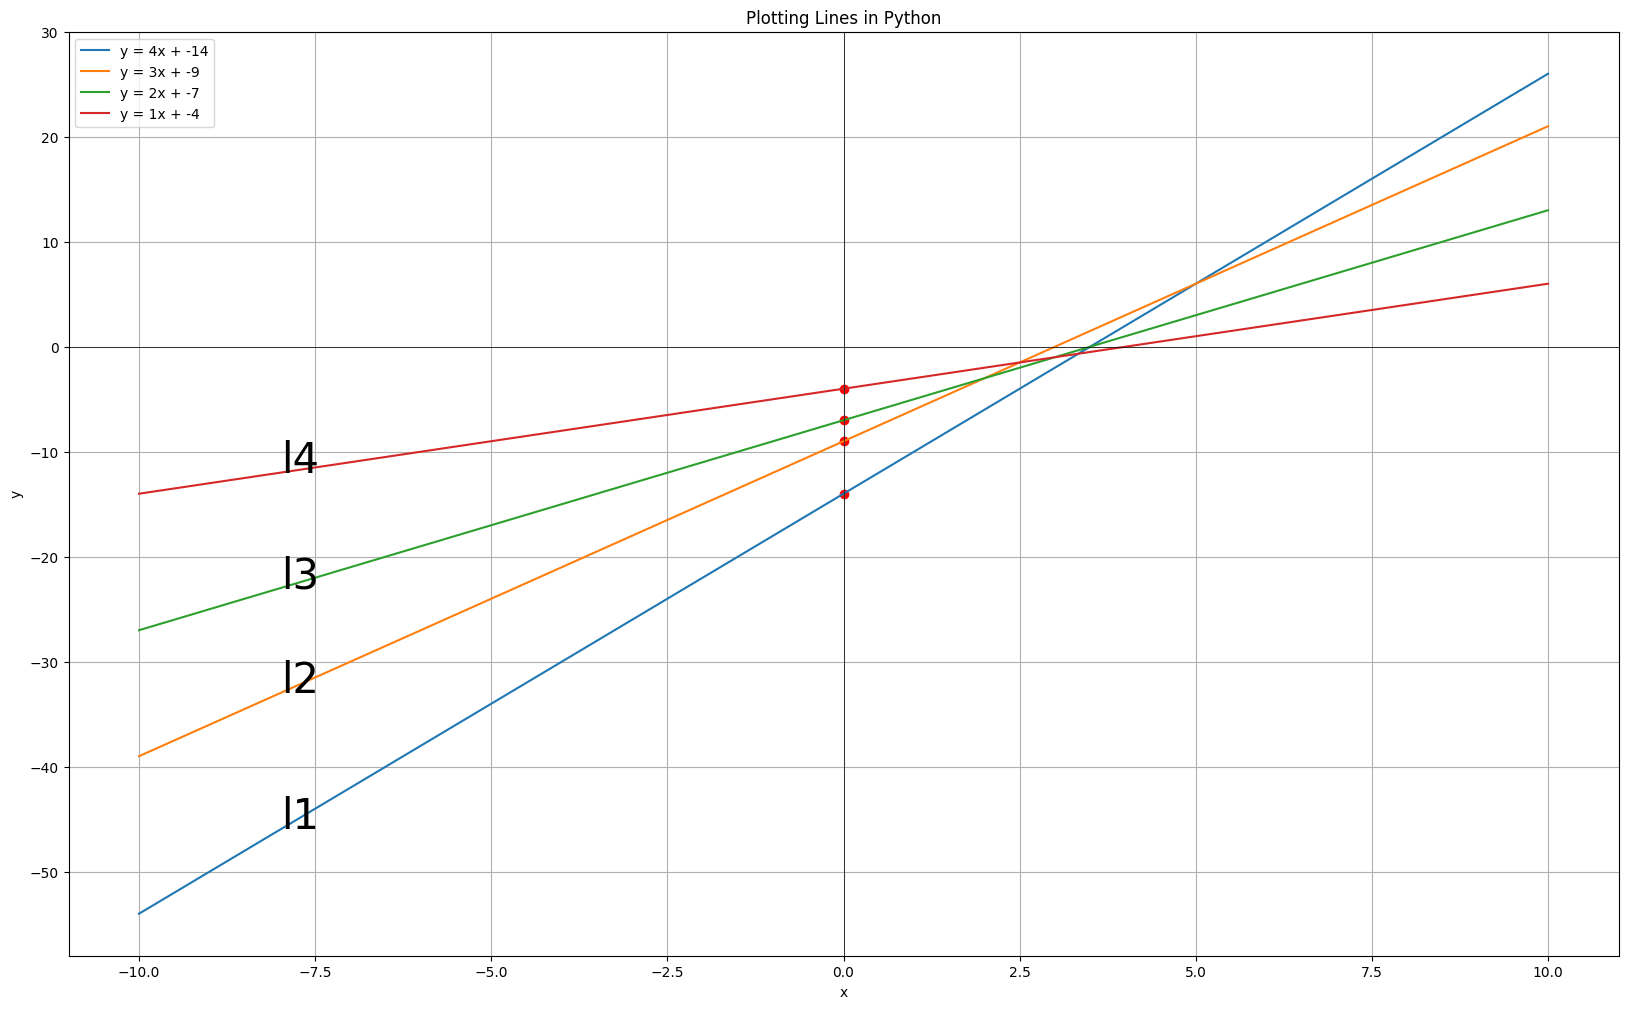

In [152]:
N = 4
arr = [0, 4, 3, 2, 5]

class Line:
    def __init__(self, m, b):
        self.m = m
        self.b = b
    def eval(self, x):
        return self.m * x + self.b
    def __repr__(self):
        return f"slope: {self.m}, y-intercept: {self.b}"
    
def decreasing_monotonic_stack(p1, p2, p3):
    return (p1.m - p2.m) * (p3.b - p1.b) >= (p1.m - p3.m) * (p2.b - p1.b)

indices = list(range(N + 1))
psum = [0] * (N + 1)
total = 0
for i in range(N):
    psum[i + 1] = psum[i] + arr[i + 1]
    total += (i + 1) * arr[i + 1]
max_delta = 0
# max_delta = 3
# decreasing slopes
# dp[i] = max(arr[i] * j - psum[j]) for j in [i, N] + psum[i] - arr[i] * i
# left cyclic subarray shift
hull = []
for i in range(N, 0, -1):
    m = i
    b = -psum[i]
    x = arr[i]
    line = Line(m, b)
    # while len(hull) >= 2 and decreasing_monotonic_stack(hull[-2], hull[-1], line):
    #     hull.pop()
    hull.append(line)
    # idx = bisect.bisect_left(indices[:len(hull) - 1], True, key = lambda i: x * (hull[i].m - hull[i + 1].m) >= hull[i + 1].b - hull[i].b)
    # max_delta = max(max_delta, hull[idx].eval(x) + psum[i] - arr[i] * i)
# print(max_delta)
# assert max_delta == 3, "wrong max_delta"
slopes = [line.m for line in hull]
y_intercepts = [line.b for line in hull]
plot_line(slopes, y_intercepts)

In [ ]:
"""
Notice when you have [l1, l2] in the monotonic stack and you are considering to add l3, you actually want to remove l2 from the stack. Because
l3 is going to give larger value at any x after it's intersection with l1 over l2.

This is the condition that will decide when to remove line from stack to maintin the monotonic nature of it.
intersection(l1, l3) <= intersection(l1, l2)
intersection(l1, l3) = (b3 - b1) / (m1 - m3)
interseciton(l1, l2) = (b2 - b1) / (m1 - m2)

Need a binary search to get the optimal value for each x value

So if you get FFFTTT, return the First True with bisect_left
And you are looking for condition x >= (b2 - b1) / (m1 - m2)
x * (m1 - m2) >= (b2 - b1)
"""

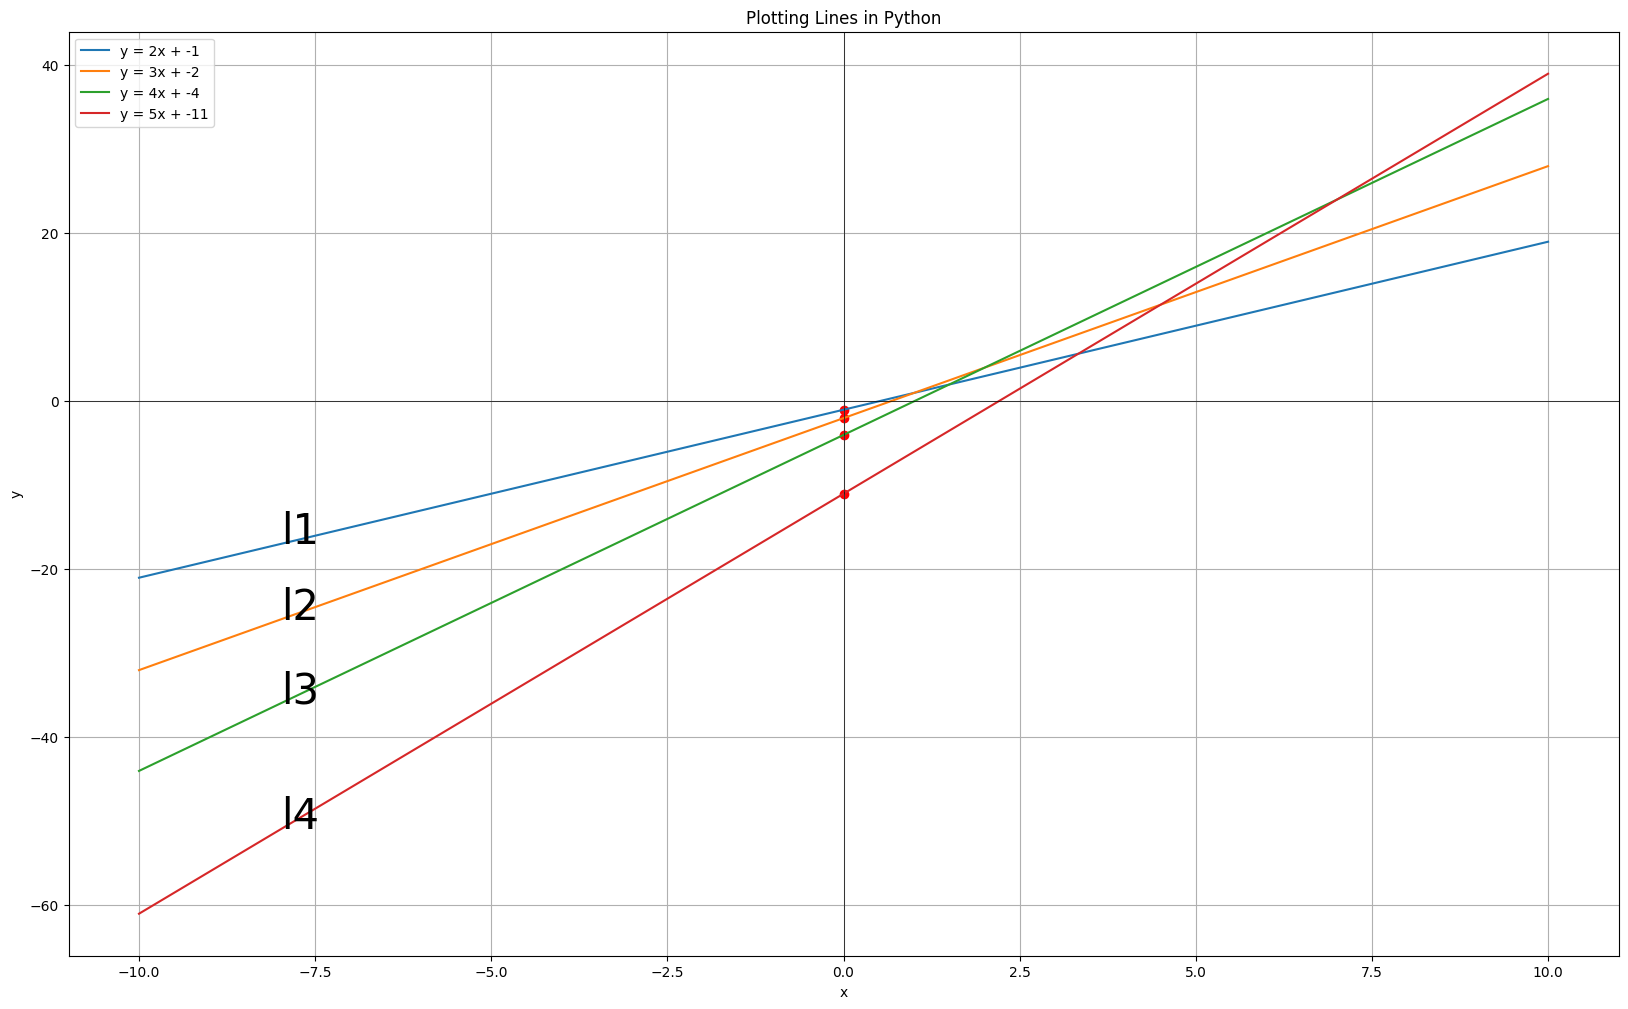

In [153]:
N = 5
arr = [0, 1, 1, 2, 7, 1]
class Line:
    def __init__(self, m, b):
        self.m = m
        self.b = b
    def eval(self, x):
        return self.m * x + self.b
    def __repr__(self):
        return f"slope: {self.m}, y-intercept: {self.b}"
    
psum = [0] * (N + 1)
total = 0
for i in range(N):
    psum[i + 1] = psum[i] + arr[i + 1]
    total += (i + 1) * arr[i + 1]
max_delta = 0
# max_delta = 7
# increasing slopes
# dp[i] = max(arr[i] * j - psum[j - 1]) for j in [1, i] + psum[i - 1] - arr[i] * i
# right cyclic subarray shift
hull = []
for i in range(2, N + 1):
    m = i
    b = -psum[i - 1]
    x = arr[i]
    line = Line(m, b)
    hull.append(line)
    # idx = bisect.bisect_left(indices[:len(hull) - 1], True, key = lambda i: x * (hull[i].m - hull[i + 1].m) >= hull[i + 1].b - hull[i].b)
    # max_delta = max(max_delta, hull[idx].eval(x) + psum[i - 1] - arr[i] * i)
# print(max_delta)
# assert max_delta == 7, "wrong max_delta"
slopes = [line.m for line in hull]
y_intercepts = [line.b for line in hull]
plot_line(slopes, y_intercepts)

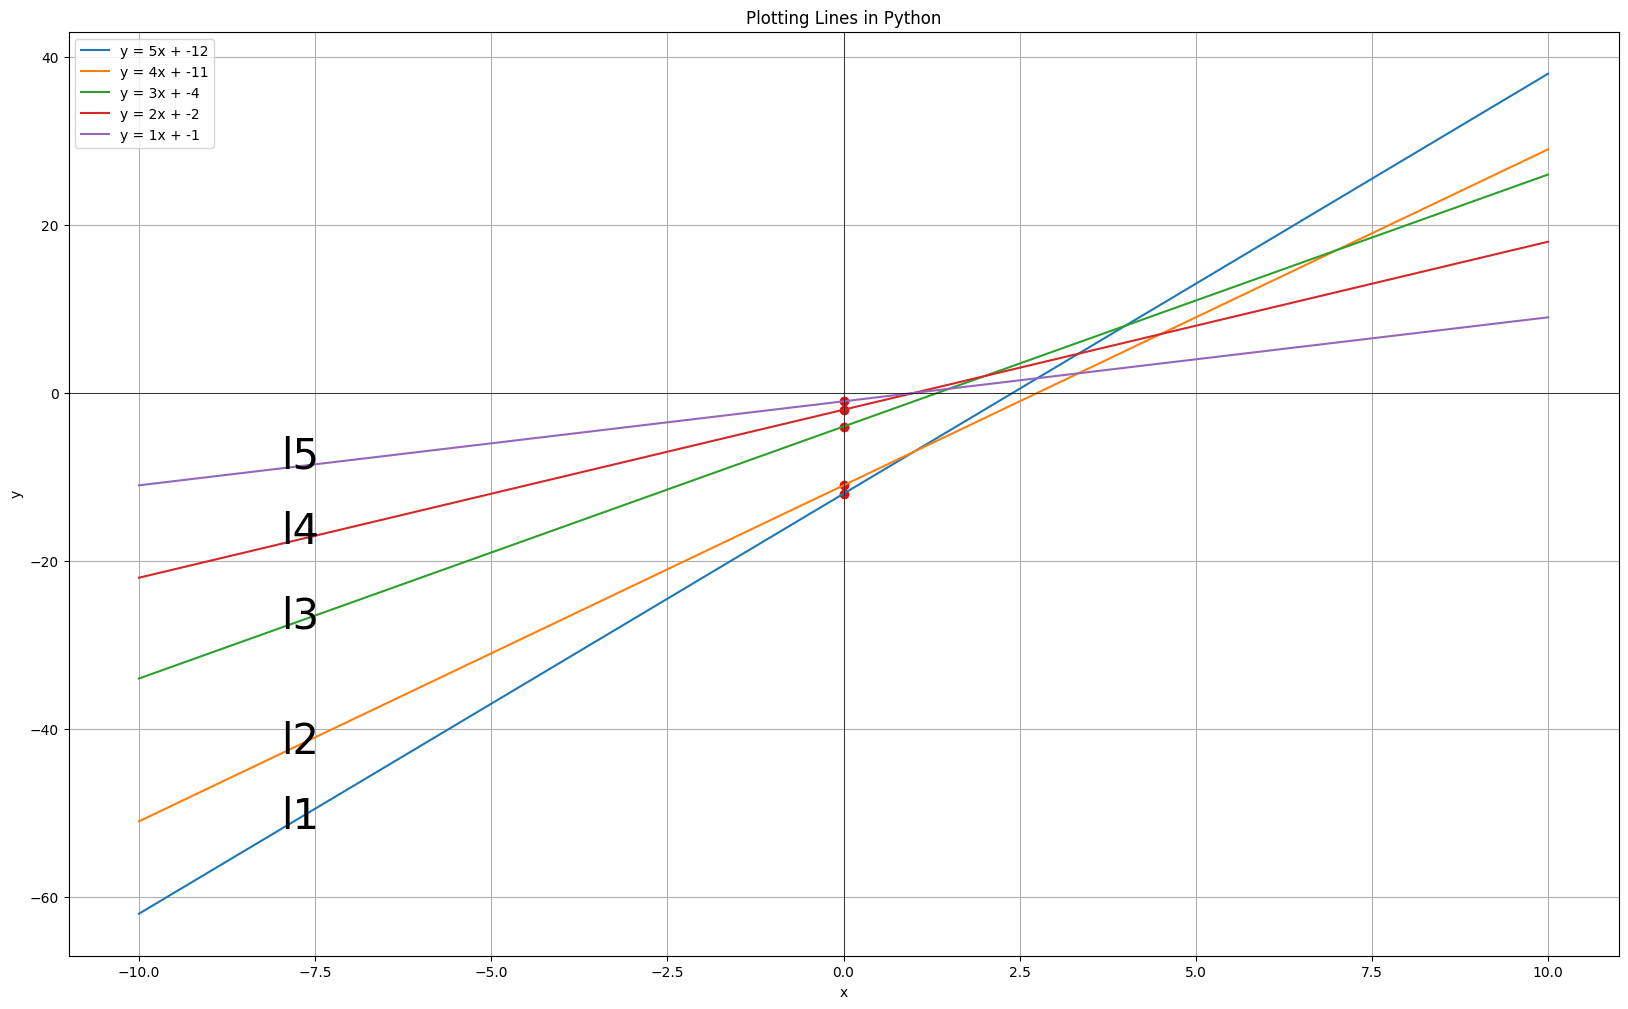

In [154]:
N = 5
arr = [0, 1, 1, 2, 7, 1]

class Line:
    def __init__(self, m, b):
        self.m = m
        self.b = b
    def eval(self, x):
        return self.m * x + self.b
    def __repr__(self):
        return f"slope: {self.m}, y-intercept: {self.b}"
    
def decreasing_monotonic_stack(p1, p2, p3):
    return (p1.m - p2.m) * (p3.b - p1.b) >= (p1.m - p3.m) * (p2.b - p1.b)

indices = list(range(N + 1))
psum = [0] * (N + 1)
total = 0
for i in range(N):
    psum[i + 1] = psum[i] + arr[i + 1]
    total += (i + 1) * arr[i + 1]
max_delta = 0
# max_delta = 3
# decreasing slopes
# dp[i] = max(arr[i] * j - psum[j]) for j in [i, N] + psum[i] - arr[i] * i
# left cyclic subarray shift
hull = []
for i in range(N, 0, -1):
    m = i
    b = -psum[i]
    x = arr[i]
    line = Line(m, b)
    # while len(hull) >= 2 and decreasing_monotonic_stack(hull[-2], hull[-1], line):
    #     hull.pop()
    hull.append(line)
    # idx = bisect.bisect_left(indices[:len(hull) - 1], True, key = lambda i: x * (hull[i].m - hull[i + 1].m) >= hull[i + 1].b - hull[i].b)
    # max_delta = max(max_delta, hull[idx].eval(x) + psum[i] - arr[i] * i)
# print(max_delta)
# assert max_delta == 6, "wrong max_delta"
slopes = [line.m for line in hull]
y_intercepts = [line.b for line in hull]
plot_line(slopes, y_intercepts)

In [ ]:
"""
We want increasing x values for each intersection between lines in the upper convex hull of the lines.  Visually can be seen above. 
That means we are maintaing a monotonic stack of weakly strictly increasing values.  Cause two that are equal also doesn't matter. Cause 
the lates line will have greater slope because adding them in increasing slope order.  So it will subsume the previous and give 
greatest y-value which is the goal.  


"""

x:  0
0 slope: 1, y-intercept: 0 0 0 0 0
0
x:  0
0 slope: 1, y-intercept: 0 0 0 0 0
0
x:  0
0 slope: 1, y-intercept: 0 0 0 0 0
0
x:  -1
0 slope: 1, y-intercept: 0 -1 -1 0 -4
3
x:  0
0 slope: 1, y-intercept: 0 0 0 -1 0
3
x:  0
0 slope: 1, y-intercept: 0 0 0 -1 0
3
x:  0
4 slope: 5, y-intercept: 1 0 1 -1 0
3
3


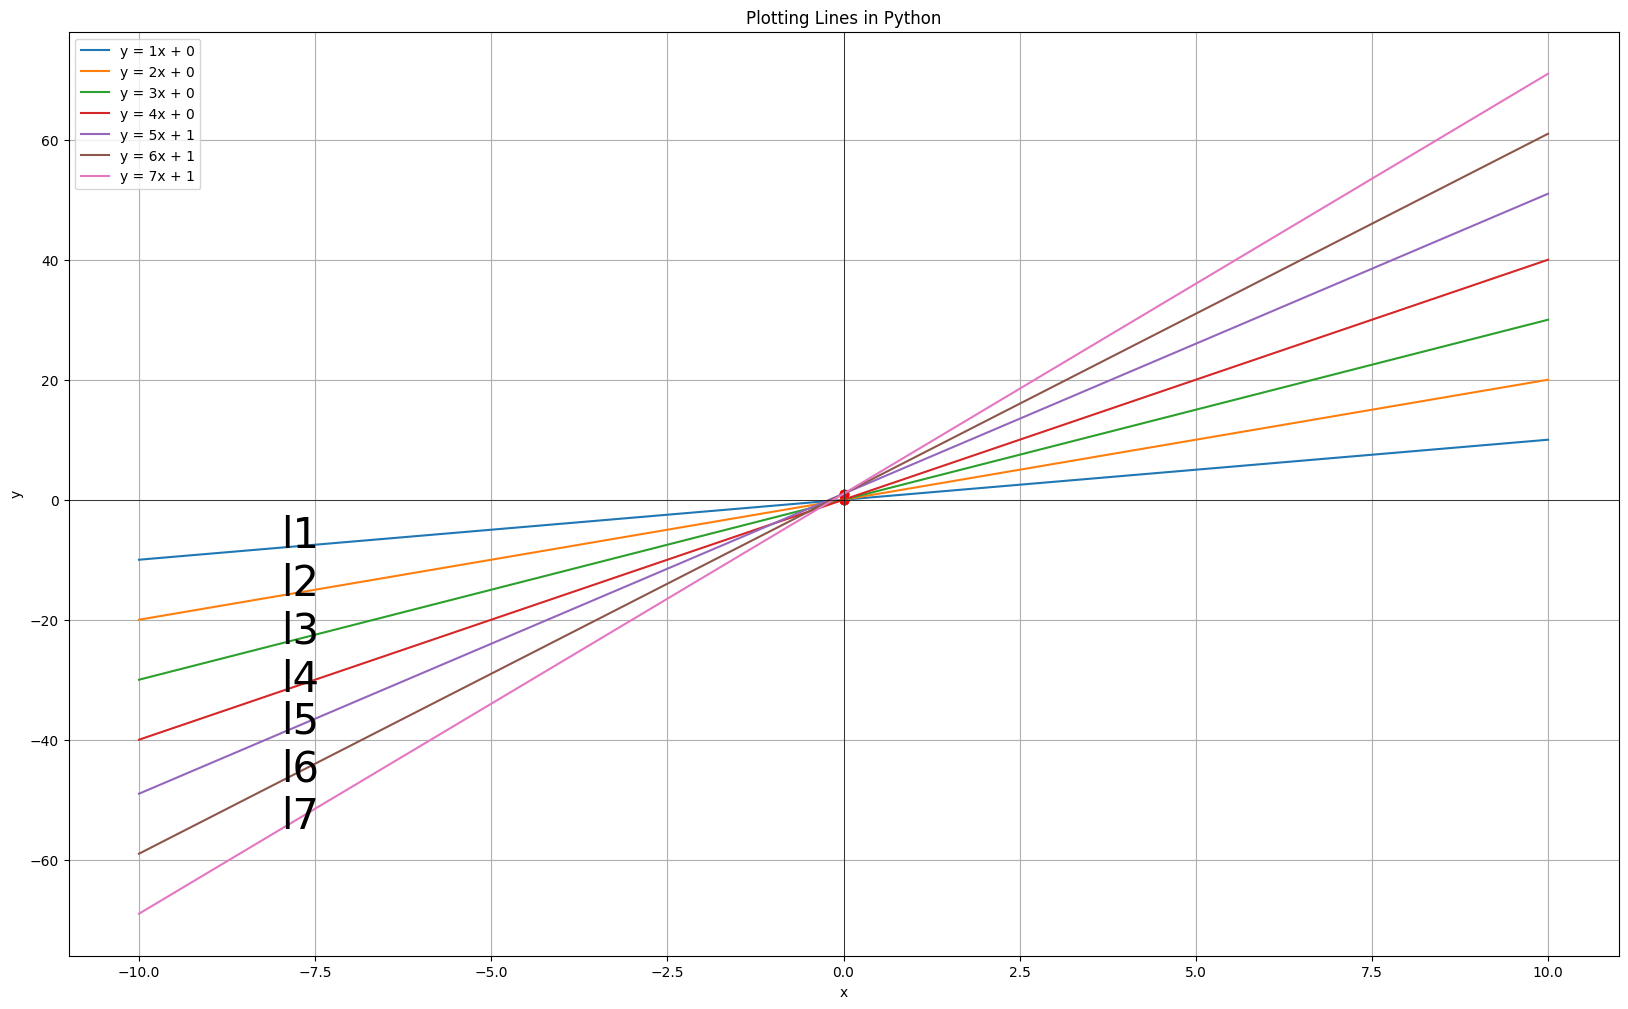

In [149]:
N = 7
arr = [0, 0, 0, 0, -1, 0, 0, 0]
class Line:
    def __init__(self, m, b):
        self.m = m
        self.b = b
    def eval(self, x):
        return self.m * x + self.b
    def __repr__(self):
        return f"slope: {self.m}, y-intercept: {self.b}"
    
psum = [0] * (N + 1)
total = 0
for i in range(N):
    psum[i + 1] = psum[i] + arr[i + 1]
    total += (i + 1) * arr[i + 1]
max_delta = 0
# max_delta = 7
# increasing slopes
# dp[i] = max(arr[i] * j - psum[j - 1]) for j in [1, i] + psum[i - 1] - arr[i] * i
# right cyclic subarray shift
hull = []
for i in range(1, N + 1):
    m = i
    b = -psum[i - 1]
    x = arr[i]
    print("x: ", x)
    line = Line(m, b)
    hull.append(line)
    idx = bisect.bisect_left(indices[:len(hull) - 1], True, key = lambda i: x * (hull[i].m - hull[i + 1].m) >= hull[i + 1].b - hull[i].b)
    print(idx, hull[idx], x, hull[idx].eval(x), psum[i - 1], arr[i] * i)
    max_delta = max(max_delta, hull[idx].eval(x) + psum[i - 1] - arr[i] * i)
    print(max_delta)
print(max_delta)
# assert max_delta == 7, "wrong max_delta"
slopes = [line.m for line in hull]
y_intercepts = [line.b for line in hull]
plot_line(slopes, y_intercepts)

1


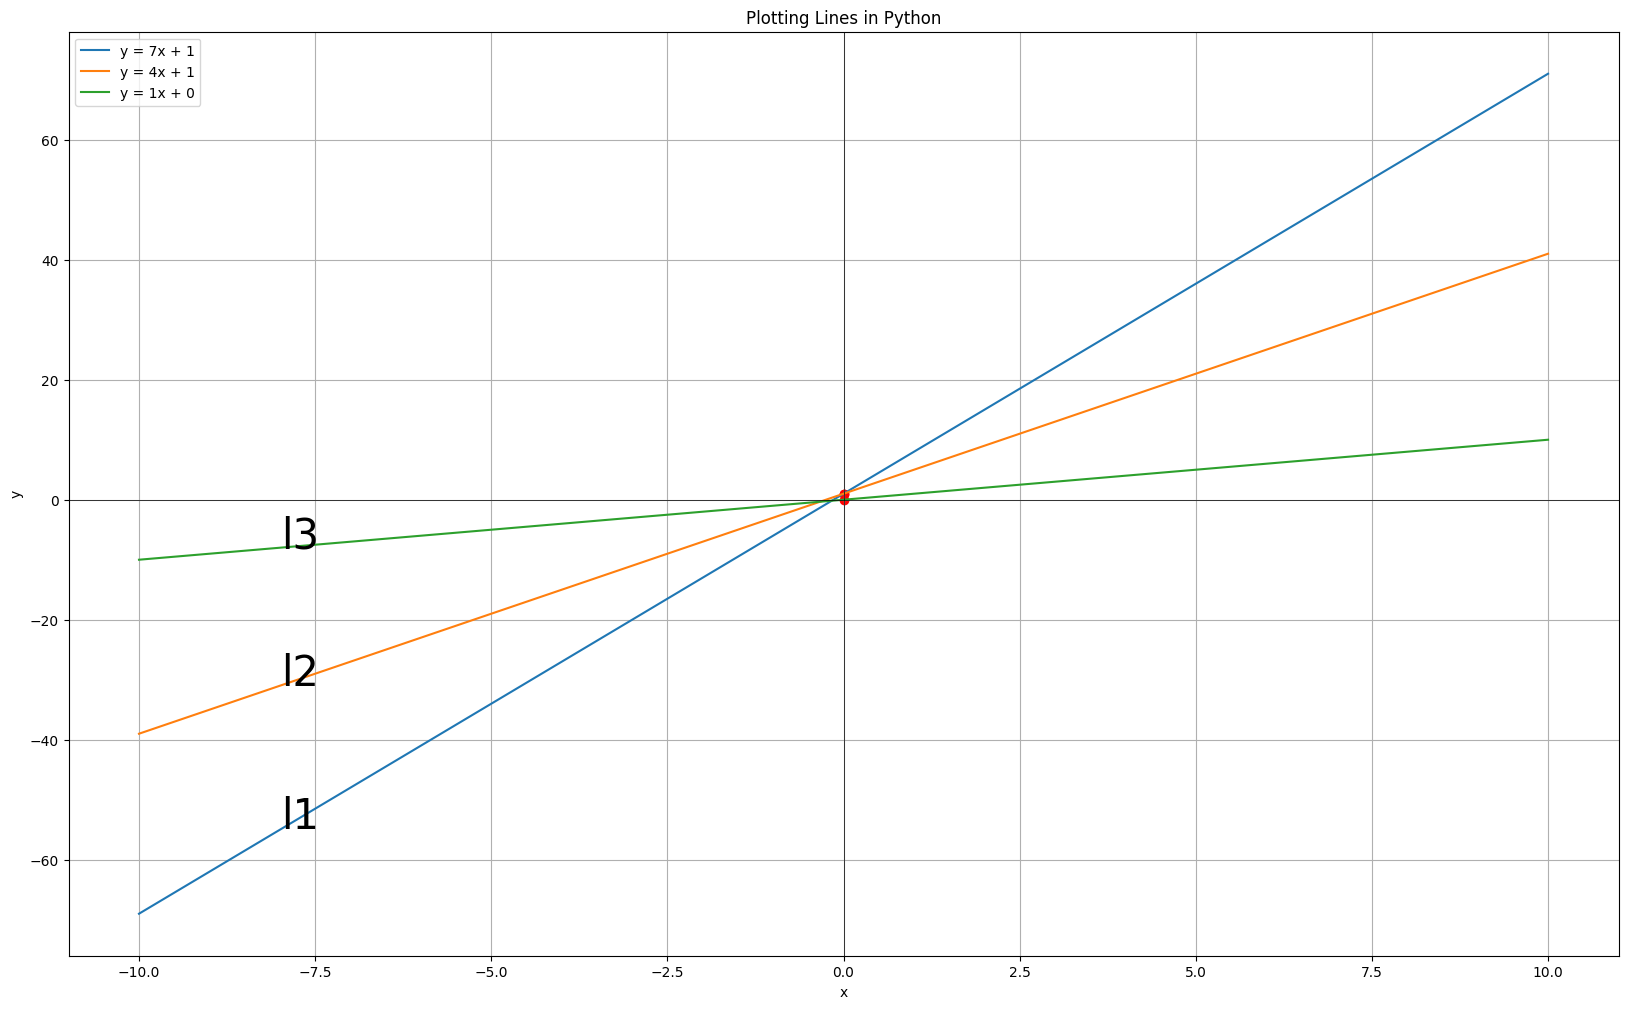

In [141]:
N = 7
arr = [0, 0, 0, 0, -1, 0, 0, 0]
class Line:
    def __init__(self, m, b):
        self.m = m
        self.b = b
    def eval(self, x):
        return self.m * x + self.b
    def __repr__(self):
        return f"slope: {self.m}, y-intercept: {self.b}"
    
def decreasing_monotonic_stack(p1, p2, p3):
    return (p1.m - p2.m) * (p3.b - p1.b) >= (p1.m - p3.m) * (p2.b - p1.b)

indices = list(range(N + 1))
psum = [0] * (N + 1)
total = 0
for i in range(N):
    psum[i + 1] = psum[i] + arr[i + 1]
    total += (i + 1) * arr[i + 1]
max_delta = 0
# max_delta = 3
# decreasing slopes
# dp[i] = max(arr[i] * j - psum[j]) for j in [i, N] + psum[i] - arr[i] * i
# left cyclic subarray shift
hull = []
for i in range(N, 0, -1):
    m = i
    b = -psum[i]
    x = arr[i]
    line = Line(m, b)
    while len(hull) >= 2 and decreasing_monotonic_stack(hull[-2], hull[-1], line):
        hull.pop()
    hull.append(line)
    idx = bisect.bisect_left(indices[:len(hull) - 1], True, key = lambda i: x * (hull[i].m - hull[i + 1].m) >= hull[i + 1].b - hull[i].b)
    max_delta = max(max_delta, hull[idx].eval(x) + psum[i] - arr[i] * i)
print(max_delta)
# assert max_delta == 6, "wrong max_delta"
slopes = [line.m for line in hull]
y_intercepts = [line.b for line in hull]
plot_line(slopes, y_intercepts)